<a href="https://colab.research.google.com/github/saritmaitra/AL-VAR-VECM-/blob/main/Changepointipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Changepoints are points in sequences of observations where there has been some sort of change on the distribution of the data points.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
!pip install ruptures
import ruptures as rpt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AL_final_data.csv to AL_final_data (1).csv


In [4]:
data = pd.read_csv("AL_final_data.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.tail()

,timestamp,es,eur_usd,gbp_usd,gc,nq,usd_jpy
29340,2020-05-29 20:56:00,3027.25,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.25,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.25,1111650.0,1235450.0,1731.45,9588.625,107830000.0
29343,2020-05-29 20:59:00,3027.25,1113400.0,1235450.0,1731.30,9587.375,107835000.0
29344,2020-05-29 21:00:00,3027.25,1113400.0,1237150.0,1731.35,9591.125,107835000.0


In [5]:
data = data.set_index('timestamp')
data

,es,eur_usd,gbp_usd,gc,nq,usd_jpy
timestamp,,,,,,
2020-05-01 00:00:00,2877.125,1094465.0,1258140.0,1695.85,8846.125,107301000.0
2020-05-01 00:01:00,2875.375,1094215.0,1257935.0,1695.60,8841.250,107368000.0
2020-05-01 00:02:00,2874.625,1094165.0,1257765.0,1695.65,8837.750,107376500.0
2020-05-01 00:03:00,2874.125,1094115.0,1257565.0,1695.40,8836.750,107381500.0
2020-05-01 00:04:00,2875.250,1094190.0,1257535.0,1694.85,8841.125,107376500.0
...,...,...,...,...,...,...
2020-05-29 20:56:00,3027.250,1111740.0,1235400.0,1731.50,9588.625,107675000.0
2020-05-29 20:57:00,3027.250,1111750.0,1235450.0,1731.20,9588.500,107830000.0
2020-05-29 20:58:00,3027.250,1111650.0,1235450.0,1731.45,9588.625,107830000.0


In [6]:
# Converting the index as date
data.index = pd.to_datetime(data.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29345 entries, 2020-05-01 00:00:00 to 2020-05-29 21:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   es       29345 non-null  float64
 1   eur_usd  29345 non-null  float64
 2   gbp_usd  29345 non-null  float64
 3   gc       29345 non-null  float64
 4   nq       29345 non-null  float64
 5   usd_jpy  29345 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


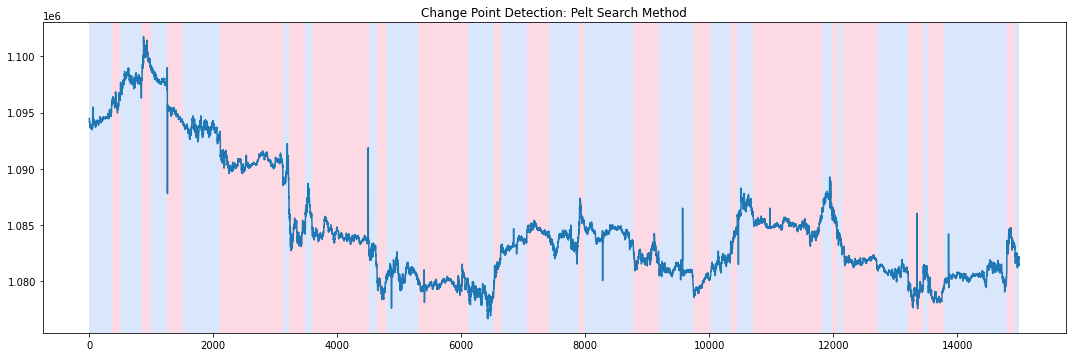

In [8]:
# Convert the time series values to a numpy 1D array
points = data['eur_usd'][:15000].values
    
# Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(15, 5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

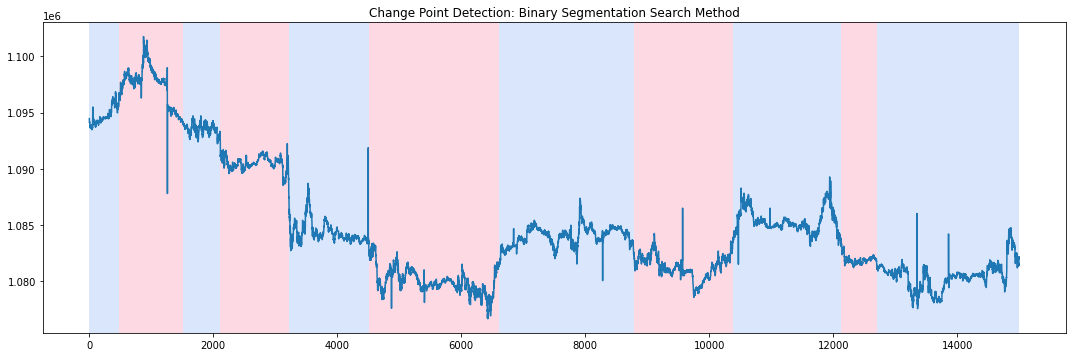

In [9]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(15, 5))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

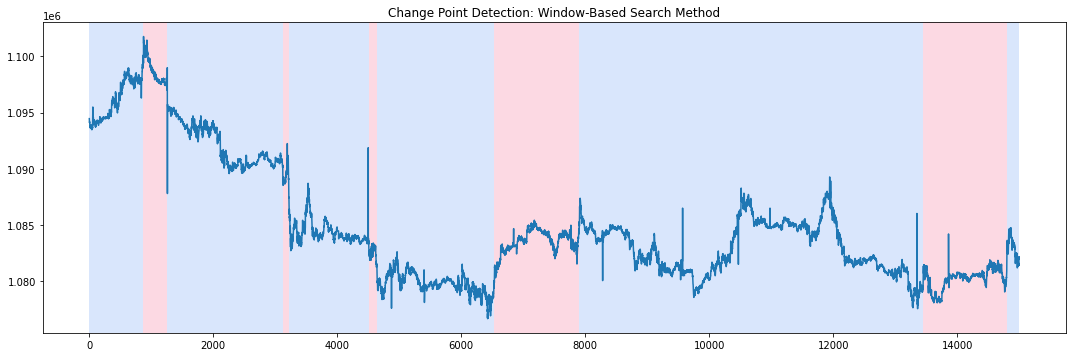

In [10]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(15, 5))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

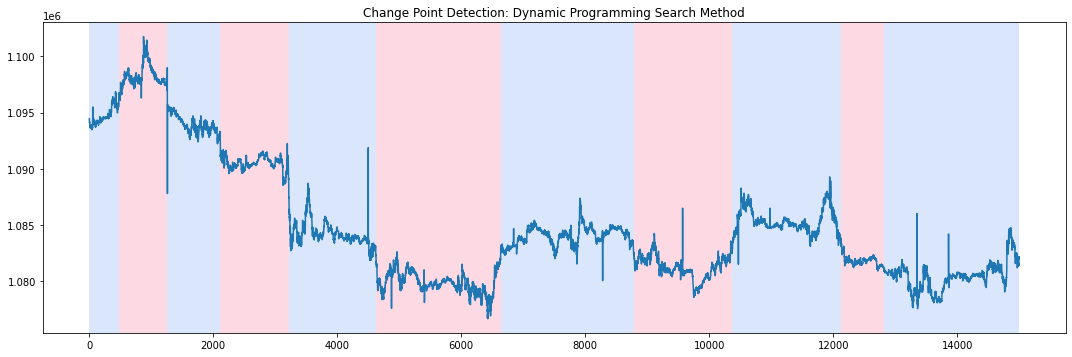

In [11]:
# Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(15, 5))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()